In [2]:
%run libreria.py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import utm
import pandas as pd
import math
from matplotlib.pyplot import figure
from matplotlib import cm as CM
from matplotlib import mlab as ML
import pymysql

def distancia_genetica_corregida(a, b, distribution, N_mam=269):
    P_A1_a1=1
    P_A2_a2=1
    P_A2_a2_hermano_a2=1
    for alele in distribution:
        P_A1_a1=P_A1_a1*(distribution[alele][a[alele]])
        P_A2_a2=P_A2_a2*(distribution[alele][b[alele]])
        # La probabilidad abajo es: si son iguales, es 1/2 (si vino de la misma columna alelo) + (1/2)*prob_del_alelo si vino de distinta columna, pero si 
        # son distintos son 1/2 * probabilidad de ese alelo. 
        P_A2_a2_hermano_a2=P_A2_a2_hermano_a2*((1/2)*int(a[alele]==b[alele])+(1/2)*distribution[alele][b[alele]])
    P_A1_A2_distinta_mama=P_A1_a1*P_A2_a2
    P_A1_A2_misma_mama=P_A1_a1*P_A2_a2_hermano_a2
    return (1/(1+(N_mam-1)*P_A1_A2_distinta_mama/P_A1_A2_misma_mama))
    

def get_connection():
    return pymysql.connect(host='ec2-18-222-185-142.us-east-2.compute.amazonaws.com',
                             user='root',
                             password='password',
                             db='dbname',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
        
    
import random
d2=0
connection=get_connection()

with connection.cursor() as cursor:
    sql="select * from tasks_abejas where task_id>119271 and task_completed>0"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()



curvas=pd.DataFrame(res)

curvas["bootstrap"]=[eval(aa)["bootstrap"] for aa in curvas["task_params"]]
curvas["N_mam"]=[eval(aa)["N_mam"] for aa in curvas["task_params"]]
curvas["urban"]=[eval(aa)["urban"] for aa in curvas["task_params"]]
curvas["rural"]=[eval(aa)["rural"] for aa in curvas["task_params"]]
curvas["min_dist"]=[eval(aa).get("min_dist", 1) for aa in curvas["task_params"]]
curvas["lambda"]=[eval(aa)["params"]["lambd"] for aa in curvas["task_params"]]
curvas["exp_mean"]=1/curvas["lambda"]




In [3]:
list(curvas["task_params"])[-3]

'{"num_abejas":3000, "bootstrap":98, "randomfun":random.expovariate, "params":{"lambd":0.19323671497584546}, "d2":d2, "N_mam":750, "urban":True, "rural":True, "weird_coords":True, "year":"QL"}'

In [4]:
curvas

,task_completed,task_id,task_name,task_params,task_responsible,bootstrap,N_mam,urban,rural,min_dist,lambda,exp_mean
0,1595008239,119273,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":0, ""randomfun""...",52.15.215.17,0,450,True,True,1.0,10.000000,0.100
1,1594924380,119274,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":1, ""randomfun""...",3.22.222.110,1,450,True,True,1.0,10.000000,0.100
2,1595052493,119275,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":2, ""randomfun""...",3.22.222.110,2,450,True,True,1.0,10.000000,0.100
3,1595168902,119276,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":3, ""randomfun""...",3.21.128.85,3,450,True,True,1.0,10.000000,0.100
4,1595281648,119277,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":4, ""randomfun""...",18.217.175.127,4,450,True,True,1.0,10.000000,0.100
5,1595187922,119278,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":5, ""randomfun""...",18.217.126.132,5,450,True,True,1.0,10.000000,0.100
6,1595053275,119279,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":6, ""randomfun""...",18.217.173.6,6,450,True,True,1.0,10.000000,0.100
7,1595105691,119280,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":7, ""randomfun""...",3.129.19.32,7,450,True,True,1.0,10.000000,0.100
8,1595022044,119281,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":8, ""randomfun""...",13.58.112.195,8,450,True,True,1.0,10.000000,0.100
9,1595193772,119282,montecarlobees,"{""num_abejas"":3000, ""bootstrap"":9, ""randomfun""...",3.22.225.211,9,450,True,True,1.0,10.000000,0.100


In [5]:
takss=list(set(curvas["task_id"]))

In [6]:
connection=get_connection()

with connection.cursor() as cursor:
    sql="select distinct task_id, total from familias_abejas_conteo where task_id in ("+", ".join([str(j) for j in takss])+")"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()



In [7]:
finn=curvas.set_index("task_id").join(pd.DataFrame(res).set_index("task_id"))

In [8]:
len(curvas)

18105

In [9]:
len(curvas)

18105

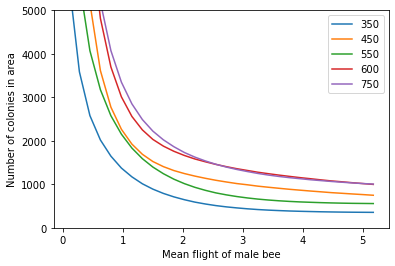

In [10]:
familias=sorted(list(set(finn[finn.min_dist==1]["N_mam"])))
for fam in familias:
    if fam!=475:
        fami=finn[(finn.N_mam==fam) & (finn.min_dist==1)]
        xs=sorted(list(set(fami["exp_mean"])))
        ys=[]
        for x in xs:
            ys.append(fami[fami.exp_mean==x]["total"].mean())
        plt.plot(xs, ys, label=fam)
    
plt.legend()
plt.ylabel("Number of colonies in area")
plt.xlabel("Mean flight of male bee")
plt.ylim([0,5000])
plt.savefig("colonies_by_flight.pdf")


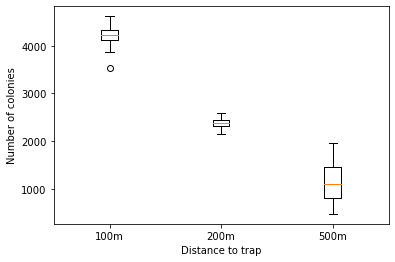

In [11]:
i=0
for min_dist in [0.2, 0.4, 1]:
    
    geto=finn[(finn["min_dist"]==min_dist) & ((finn["exp_mean"]==2.5) | (finn["exp_mean"]==2.55))]
    plt.boxplot(geto["total"], positions=[i])
    i+=1
    
plt.xticks([0, 1, 2], ["100m", "200m", "500m"])
plt.xlabel("Distance to trap")
plt.ylabel("Number of colonies")
plt.savefig("distribution_number_colonies600F.pdf")


In [ ]:
750*

In [12]:
%run /Users/Bernardo/Desktop/bees/libreria.py

<Figure size 432x288 with 0 Axes>

In [13]:
starttime=time.time()
    
#get basic information and variables

f=open("/Users/Bernardo/Desktop/bees/distribution.txt", "r")
dict=f.read()
f.close()
distribution=eval(dict)
tot_abejas=2118

other_coords=['Caringbah', 'Parramatta', 'Strickland']
urban_coords=["Marrickville", "Surry Hills", "Camperdown", "Asheville", "Balgowlah "]
rural_coords=["Jannali", "Sutherland", "Manley", "Lindfield", "Gordon", "Palmbeach", "Stives"]
locations, coordenadas, distance_national_park=get_loc_coords_dnp()

urban=True
rural=True

xaxis  = [utm.from_latlon(coordenadas[l][0],coordenadas[l][1])[0]  for l in coordenadas]
yaxis =  [utm.from_latlon(coordenadas[l][0],coordenadas[l][1])[1] for l in coordenadas]
medy  =  np.mean(yaxis)
medx  =  np.mean(xaxis)

xaxis  = [to_xy((coordenadas[l][0],coordenadas[l][1]))[0]  for l in coordenadas]
yaxis = [to_xy((coordenadas[l][0],coordenadas[l][1]))[1] for l in coordenadas]
medy2  =  np.mean(yaxis)
medx2  =  np.mean(xaxis)

information={}



for k in coordenadas:
    if k not in urban_coords+rural_coords+other_coords: print(7/0)
    if ((urban==True) and (k in urban_coords)) or ((rural==True) and (k in rural_coords)) or ((rural==True) and (urban==True)):
        information[k]={}
        information[k]["coordenadas"]=coordenadas[k]
        utm_val=utm.from_latlon(coordenadas[k][0], coordenadas[k][1])
        information[k]["utm_xy_or"]=utm_val
        information[k]["utm_xy"]=((utm_val[0]-medx)/1000, (utm_val[1]-medy)/1000)
        xy_val=to_xy(coordenadas[k])
        information[k]["alt_xy"]=((xy_val[0]-medx2)/1000, (xy_val[1]-medy2)/1000)


list_cor=list(pd.DataFrame(information ).loc["utm_xy"])
list_cor_keys=list(pd.DataFrame(information).transpose().index)
utm_xs=[i[0] for i in list_cor]
utm_ys=[i[1] for i in list_cor]
xs_max=np.max(utm_xs)+20
xs_min=np.min(utm_xs)-20
ys_max=np.max(utm_ys)+20
ys_min=np.min(utm_ys)-20


In [14]:
[(k[0]*1000+medx, k[1]*1000+medy) for k in list_cor]

[(329941.2481639908, 6246889.888394828),
 (334441.4350315273, 6248628.954749029),
 (332464.4094540021, 6249102.357685458),
 (326417.42521921534, 6247979.844384016),
 (339585.13750499405, 6259549.144850306),
 (341358.96791600145, 6258308.7437090725),
 (321948.50932798104, 6234820.601508275),
 (320691.6677483932, 6232259.59737914),
 (331381.8994091859, 6268948.651472769),
 (343670.3325311149, 6273314.689693034),
 (329904.9438023586, 6261716.458296533),
 (328736.73496348405, 6263160.969183585),
 (325677.9232910599, 6229476.2681312),
 (315722.7922133809, 6258153.024987653),
 (330650.78497085697, 6260908.838541286)]

In [15]:
xs_max_tr=xs_max*1000+medx
xs_min_tr=xs_min*1000+medx
ys_max_tr=ys_max*1000+medy
ys_min_tr=ys_min*1000+medy

In [16]:
corners=[[xs_max_tr, ys_max_tr], [xs_max_tr, ys_min_tr], [xs_min_tr, ys_min_tr], [xs_min_tr, ys_max_tr]]
ncors=[]
for cor in corners:
    ncors.append(utm.to_latlon(cor[0], cor[1], 56, "H"))
    
ncors.append(ncors[0])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [18]:
information

{'Marrickville': {'coordenadas': (-33.90468, 151.16067),
  'utm_xy_or': (329941.2481639908, 6246889.888394828, 56, 'H'),
  'utm_xy': (-0.23169927251240005, -5.991313802916556),
  'alt_xy': (5.259910288352519, -0.400205366987735)},
 'Surry Hills': {'coordenadas': (-33.88972, 151.20965),
  'utm_xy_or': (334441.4350315273, 6248628.954749029, 56, 'H'),
  'utm_xy': (4.268487595024111, -4.252247448715381),
  'alt_xy': (3.802745512550697, 5.046122140064836)},
 'Camperdown': {'coordenadas': (-33.88514, 151.18837),
  'utm_xy_or': (332464.4094540021, 6249102.357685458, 56, 'H'),
  'utm_xy': (2.2914620174989104, -3.778844512286596),
  'alt_xy': (3.356634906055406, 2.679894101064652)},
 'Asheville': {'coordenadas': (-33.89428, 151.12279),
  'utm_xy_or': (326417.42521921534, 6247979.844384016, 56, 'H'),
  'utm_xy': (-3.7555222172878566, -4.901357813728973),
  'alt_xy': (4.246908037795685, -4.612269188284874)},
 'Balgowlah ': {'coordenadas': (-33.79207, 151.26724),
  'utm_xy_or': (339585.13750499405

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function now deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function now deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function now deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


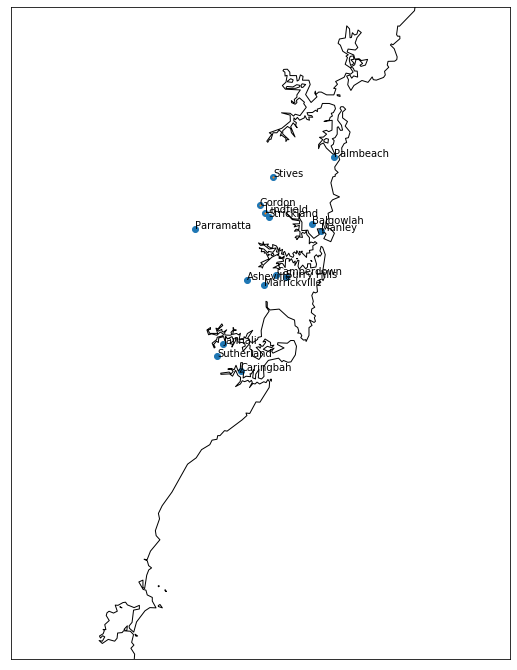

In [27]:

plt.figure(figsize=(12,12))

# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=150.6,llcrnrlat=-34.591003504203526,
            urcrnrlon=151.7,
            urcrnrlat=-33.391003504203526,
            projection='lcc',lat_1=-33.491003504203526,lat_2=-39.235773685145425,lon_0=150.78201521493236,
            resolution ='h',area_thresh=0.0000005)
# read shapefile.



m.drawcoastlines()
m.drawcountries()
m.drawrivers()

#x, y = m([k[1] for k in ncors], [k[0] for k in ncors])
#plt.plot(x, y)

x, y = m([information[p]["coordenadas"][1] for p in information], [information[p]["coordenadas"][0] for p in information])
plt.scatter(x, y)
for xx, yy, s in zip(x, y, list(information.keys())):
    plt.text(xx, yy, s)

kurigngai=["Stives", "Gordon", "Lindfield"]
x, y = m([information[p]["coordenadas"][1] for p in kurigngai], [information[p]["coordenadas"][0] for p in kurigngai])
plt.scatter(x, y, s=1)
plt.savefig("mapColonies.pdf")

    

In [25]:
information.keys()

dict_keys(['Marrickville', 'Surry Hills', 'Camperdown', 'Asheville', 'Balgowlah ', 'Manley', 'Jannali', 'Sutherland', 'Stives', 'Palmbeach', 'Lindfield', 'Gordon', 'Caringbah', 'Parramatta', 'Strickland'])

In [46]:
ncors

[(-33.491003504203526, 151.53249524349738),
 (-34.24690062649693, 151.51950041103092),
 (-34.235773685145425, 150.78201521493236),
 (-33.48018752375011, 150.80147254288337)]

In [24]:
sorted(list(set(finn[(finn["min_dist"]==1)]["exp_mean"])))

[0.1,
 0.275,
 0.44999999999999996,
 0.6249999999999999,
 0.8,
 0.9749999999999999,
 1.15,
 1.325,
 1.5,
 1.675,
 1.8500000000000003,
 2.025,
 2.15,
 2.1999999999999997,
 2.375,
 2.55,
 2.725,
 2.9,
 3.0749999999999997,
 3.25,
 3.425,
 3.5999999999999996,
 3.775,
 3.9499999999999997,
 4.124999999999999,
 4.299999999999999,
 4.475,
 4.6499999999999995,
 4.824999999999999,
 4.999999999999999,
 5.174999999999999]